In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [2]:
df = pd.read_csv('/Users/karansoniii/Documents/Projects(ML)/Music_Recommendation_System/spotify_millsongdata.csv')
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [4]:
df.describe()

,artist,song,link,text
count,57650,57650,57650,57650
unique,643,44824,57650,57494
top,Donna Summer,Have Yourself A Merry Little Christmas,/a/abba/ahes+my+kind+of+girl_20598417.html,I just came back from a lovely trip along the ...
freq,191,35,1,6


In [5]:
Top_Artist = df['artist'].value_counts().head(10)
print('\nTop 10 Artists:')
print(Top_Artist)


Top 10 Artists:
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Cher                187
Alabama             187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


In [6]:
df.shape

(57650, 4)

In [7]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [8]:
df = df.sample(10000)

df = df.drop('link', axis=1).reset_index(drop=True)

In [9]:
df.shape

(10000, 3)

In [10]:
df.head()

,artist,song,text
0,Starship,Good Heart,"Ooh \r\n(Give a good heart, give a good heart..."
1,Paul Simon,Nobody,Who knows my secret broken bone \r\nWho feels...
2,Amy Grant,Little Town,Written by Amy Grant \r\nYour smile lights up...
3,Elvis Presley,Everybody Come Aboard,Everybody come aboard The Showboat tonight \r...
4,Hollies,Heartbeat,"Heartbeat, why do you miss \r\nWhen my baby k..."


In [11]:
#WordCloud for song lyrics
all_lyrics = ' '.join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lyrics)

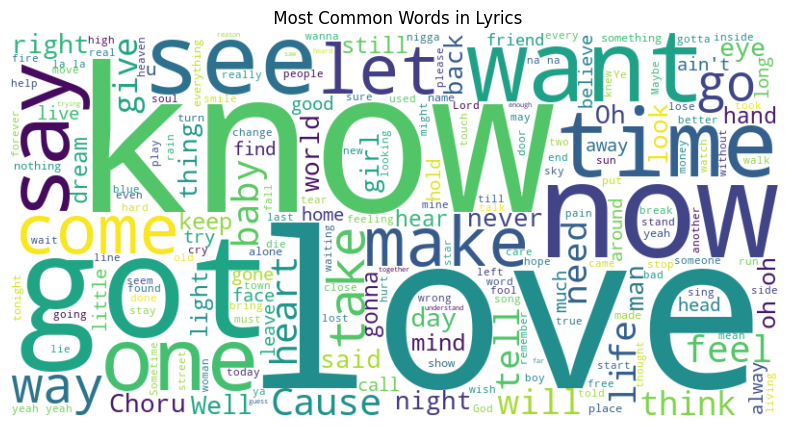

In [12]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(' Most Common Words in Lyrics')
plt.show()

Data Preprocessing

In [13]:
#downloading nltk data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/karansoniii/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/karansoniii/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karansoniii/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stop_words =set(stopwords.words('english'))

In [15]:
def preprocesss_text(text):
    #Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    #Convert to lowercase
    text = text.lower()
    #Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [16]:
df['Cleaned_text'] = df['text'].apply(preprocesss_text)

In [17]:
df.head()

,artist,song,text,Cleaned_text
0,Starship,Good Heart,"Ooh \r\n(Give a good heart, give a good heart...",ooh give good heart give good heart give good ...
1,Paul Simon,Nobody,Who knows my secret broken bone \r\nWho feels...,knows secret broken bone feels flesh gone witn...
2,Amy Grant,Little Town,Written by Amy Grant \r\nYour smile lights up...,written amy grant smile lights room like candl...
3,Elvis Presley,Everybody Come Aboard,Everybody come aboard The Showboat tonight \r...,everybody come aboard showboat tonight gon na ...
4,Hollies,Heartbeat,"Heartbeat, why do you miss \r\nWhen my baby k...",heartbeat miss baby kisses heartbeat love kiss...


In [18]:
Tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = Tfidf_vectorizer.fit_transform(df['Cleaned_text'])

In [19]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [20]:
def recommend_songs(song_name, cosine_sim=cosine_sim, df=df, top_n=10):
    #Finding the index of song
    idx = df[df['song'].str.lower() == song_name.lower()].index
    if len(idx) == 0:
        return "Song Not Found In Dataset!!"
    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    song_indices = [i[0] for i in sim_scores]

    return df[['artist', 'song']].iloc[song_indices]

In [21]:
df['song'][2]

'Little Town'

In [22]:
print("\n Recommendation For Song:")
recommendation = recommend_songs('Hey Joe')
print(recommendation)


 Recommendation For Song:
               artist                    song
5254  Harry Belafonte            Hold 'Em Joe
9428             Cher                 Hey Joe
5352    Hank Williams               No No Joe
5857     Eric Clapton                 Hey Hey
758     Elvis Presley           Hey, Hey, Hey
393      Alice Cooper             Fantasy Man
9401    Glen Campbell          Hey Little One
1522     Dolly Parton       Gypsy, Joe And Me
7382         Fabolous  Money Goes, Honey Stay
7402      Soundgarden              Little Joe
